# Model for Car Price Prediction

### Problem Statement

A Chinese automobile company ABCD Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 They have contracted an automobile consulting company to understand the factors on which the pricing of a car depends. Specifically, they want to understand the factors affecting the pricing of cars in the American marketing, since those may be very different from the Chinese market. Essentially, the company wants to know:
 
 
•	Which variables are significant in predicting the price of a car

•	How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 


### Goal of this assignment

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. 

>> ### Solution

Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv("C:/Users/Abhishek/Desktop/Personal/Ymetis/ABCD Car's  Assignment- Modeling/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Car Company Name
BrandName = df["CarName"].apply(lambda x : x.split(" ")[0])
df.insert(3 , "BrandName" , BrandName)
df.drop("CarName" , axis = 1 , inplace = True)
df.head()

,car_ID,symboling,BrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
BrandName           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Number of Unique Brands

df["BrandName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
# Names of some car companies are misspelt and should be corrected

df["BrandName"] = df.BrandName.str.lower()

def name_correction(a,b):
    df.BrandName.replace(a,b,inplace = True)
    
name_correction('maxda','mazda')
name_correction('porcshce','porsche')
name_correction('toyouta','toyota')
name_correction('vokswagen','volkswagen')
name_correction('vw','volkswagen')
name_correction('alfa-romero','alfa-romeo')

In [8]:
df.BrandName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
# Data Overview

df.describe().round(decimals =2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


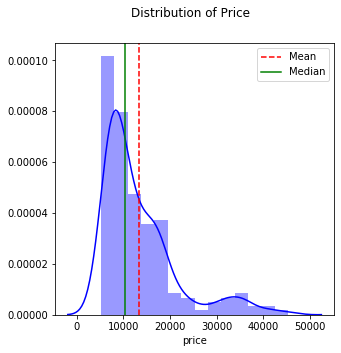

In [10]:
# Target Variable
plt.figure(figsize=(5,5))
plt.subplot()
plt.suptitle("Distribution of Price")
sns.distplot(df.price , color = "blue")
mean = df["price"].mean()
median = df["price"].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({"Mean":mean , "Median" :median})

Inference :  
>Distribution is right skewed , most of the price points are low (below mean)\
>High variance in price as data is spread far from mean \
>One local maxima indicates that the data is a mix of high and low end cars
>Significant gap b/w mean and median

###### View of Caategorical variables

In [11]:
cat_vars = df.select_dtypes(include = [np.object]).columns
print(cat_vars)

Index(['BrandName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [12]:
cat_vars.shape

(10,)

In [13]:
print(df.symboling.value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


#### Insurance rating distribution indicates a lot of insurance risky cars in dataset

##### Relation of information features with target variable

Categorical variables

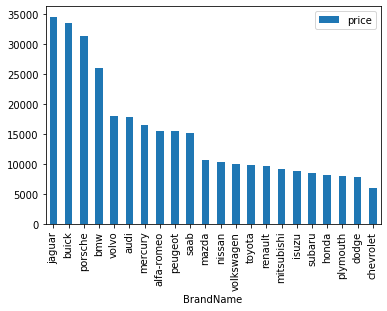

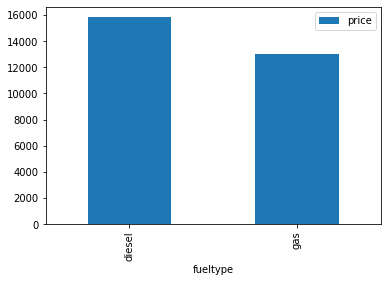

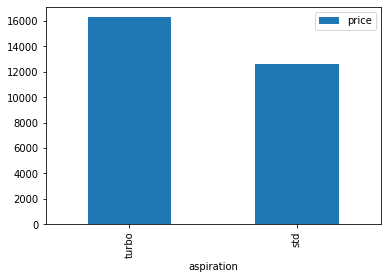

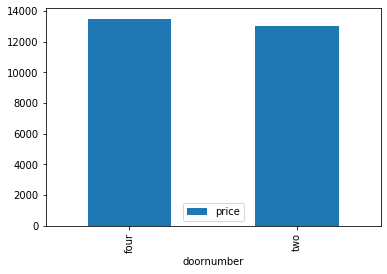

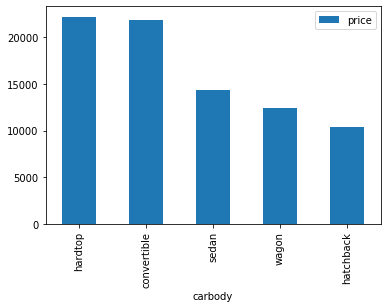

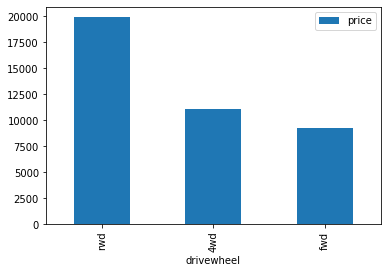

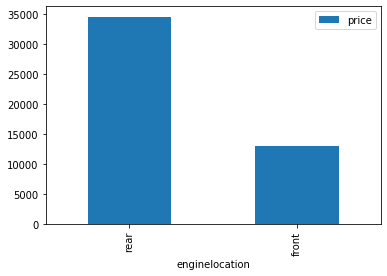

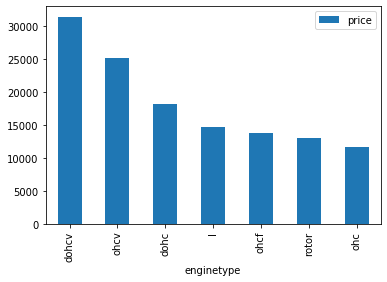

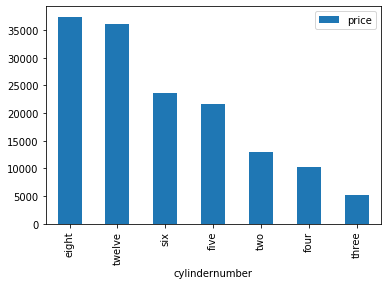

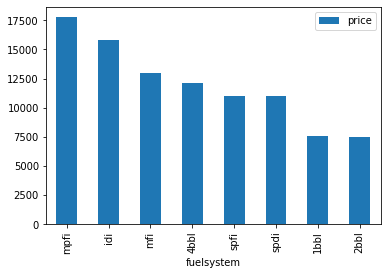

In [14]:
for i in cat_vars:
    x=pd.DataFrame(df.groupby([i])["price"].mean().sort_values(ascending=False))
    x.plot.bar()
    #plt.title("Average Price Across" + " " + i)
    #plt.show()


##### Inference :  
    >Brand :  Jaguar , BMW , Buick , porsche are upper end cars. Similary audi , volvo , alfa-romeo , mercury , peugot, saab are middle range segment and rest are low range  
    > Fuel Type : Price of Diesel car > Gas car  
    > Aspiration : price of turbo > std  
    > Doornumber : Does not have much impact on price  
    > Carbody : Hardtop / Convertible cars are costlier than other variants  
    > Drivewheel : Rear wheel drives are costlier  
    > Enginelocation : rear is costlier  
    > Engine type : dohcv / ohcv are costlier variants  
    > Cylinder number : Usually more would mean higher price  
    > Fuelsystem : Most variants have similar price  

### Note :   

> The frequencies of each type of specs for a given category were not considered for drawing above inference  \

> Assuming that the manufacturer would operate in a particular luxury segment , a brand tier should be assigned to it

> As each spec of a category can have different impact when combined with specs from other categories , we must create variables for each specification of a given category to cover all possible combimations

Scatter Plot to understand behaviour of numerical vars

In [15]:
num_vars = df.select_dtypes(exclude = [np.object]).columns
print(num_vars)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


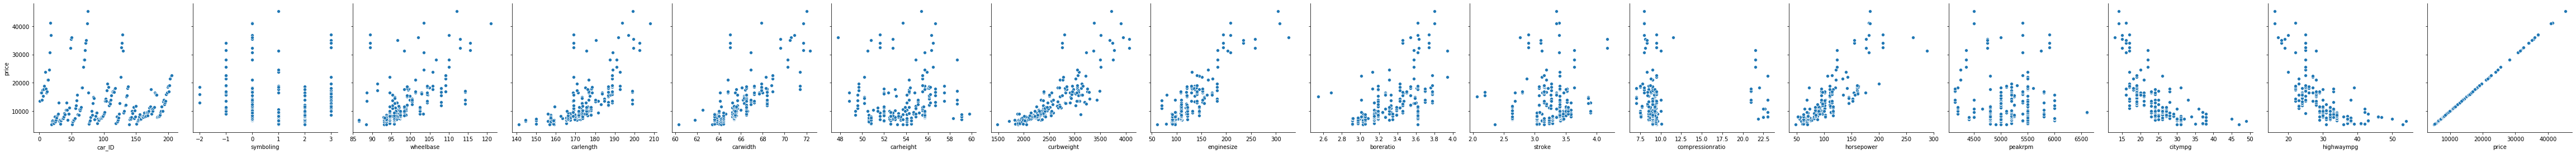

In [16]:
sns.pairplot(df ,
             x_vars =  num_vars,
             y_vars = ["price"],
             palette="husl" , height = 4,aspect=1)

##### Inference
> Curbweight and horsepower have strong positive correlation with price  

> Mileage has negative correlation , this shows luxury car buyers prioritize asthetics over mileage  

> Enginesize has a good correlation but it's not distributed well across price segments

> Car length and car width are similar for most cars but determine high price after a certain value of dimension

Dummy variable creation for all categorical vars

In [17]:
cat_vars = df.select_dtypes(include = [np.object]).columns
print(cat_vars)

Index(['BrandName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [18]:
# categorizing brands into segments
# It can be inferred from price distribution that any car above 20000 is a high end car

df_v1 = df.copy()
avg_price = df_v1.groupby("BrandName")['price'].mean()
temp = df_v1.merge(avg_price.reset_index() , how = "left" , on = "BrandName")
brackets = [0,20000 ,40000]
brand_bins = ["Low/Medium-End" , "High-End"]
df_v1["segment"] = pd.cut(temp["price_y"] , brackets , right = True , labels = brand_bins).astype(object)


In [19]:
df_v1.head()

,car_ID,symboling,BrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,segment
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Low/Medium-End
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Low/Medium-End
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Low/Medium-End
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Low/Medium-End
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Low/Medium-End


In [20]:
df_v1["segment"].value_counts()

Low/Medium-End    181
High-End           24
Name: segment, dtype: int64

#### Drop variables not required for estimation based on visualization and also category vars which are not required

In [21]:
df_v1.columns

Index(['car_ID', 'symboling', 'BrandName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'segment'],
      dtype='object')

In [22]:
drop_vars = ['car_ID', 'symboling', 'BrandName', 'stroke', 'compressionratio' , 
             "doornumber" , "enginelocation" , "fuelsystem" , "peakrpm" , "carheight" , "compressionratio"]
df_v2 = df_v1.drop(drop_vars , axis = 1)

In [23]:
df_v2.shape

(205, 17)

Dummy Variable Creation to include categorical variables for estimation

In [24]:
cat_vars = df_v2.select_dtypes(include = [np.object]).columns
print(cat_vars)

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'segment'],
      dtype='object')


In [25]:
# Adding a prefix to identify category after dummy creation
df_v3 = df_v2.copy()

for i in cat_vars:
    df_v3[i] = i + "-" + df_v3[i]

In [26]:
# Dummy function



def dummy_func(x,df):
    temp = pd.get_dummies(df[x] , drop_first = True)
    df = pd.concat([df , temp] , axis = 1)
    df.drop([x] , axis = 1)
    return df

for i in cat_vars:
    df_v3 = dummy_func(i,df_v3)
    
df_v3 = df_v3.drop(cat_vars , axis = 1)

In [27]:
df_v3.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype-ohcf,enginetype-ohcv,enginetype-rotor,cylindernumber-five,cylindernumber-four,cylindernumber-six,cylindernumber-three,cylindernumber-twelve,cylindernumber-two,segment-Low/Medium-End
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,1,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,1,0,0,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
df_v3.shape

(205, 31)

#### Correlation Matrix

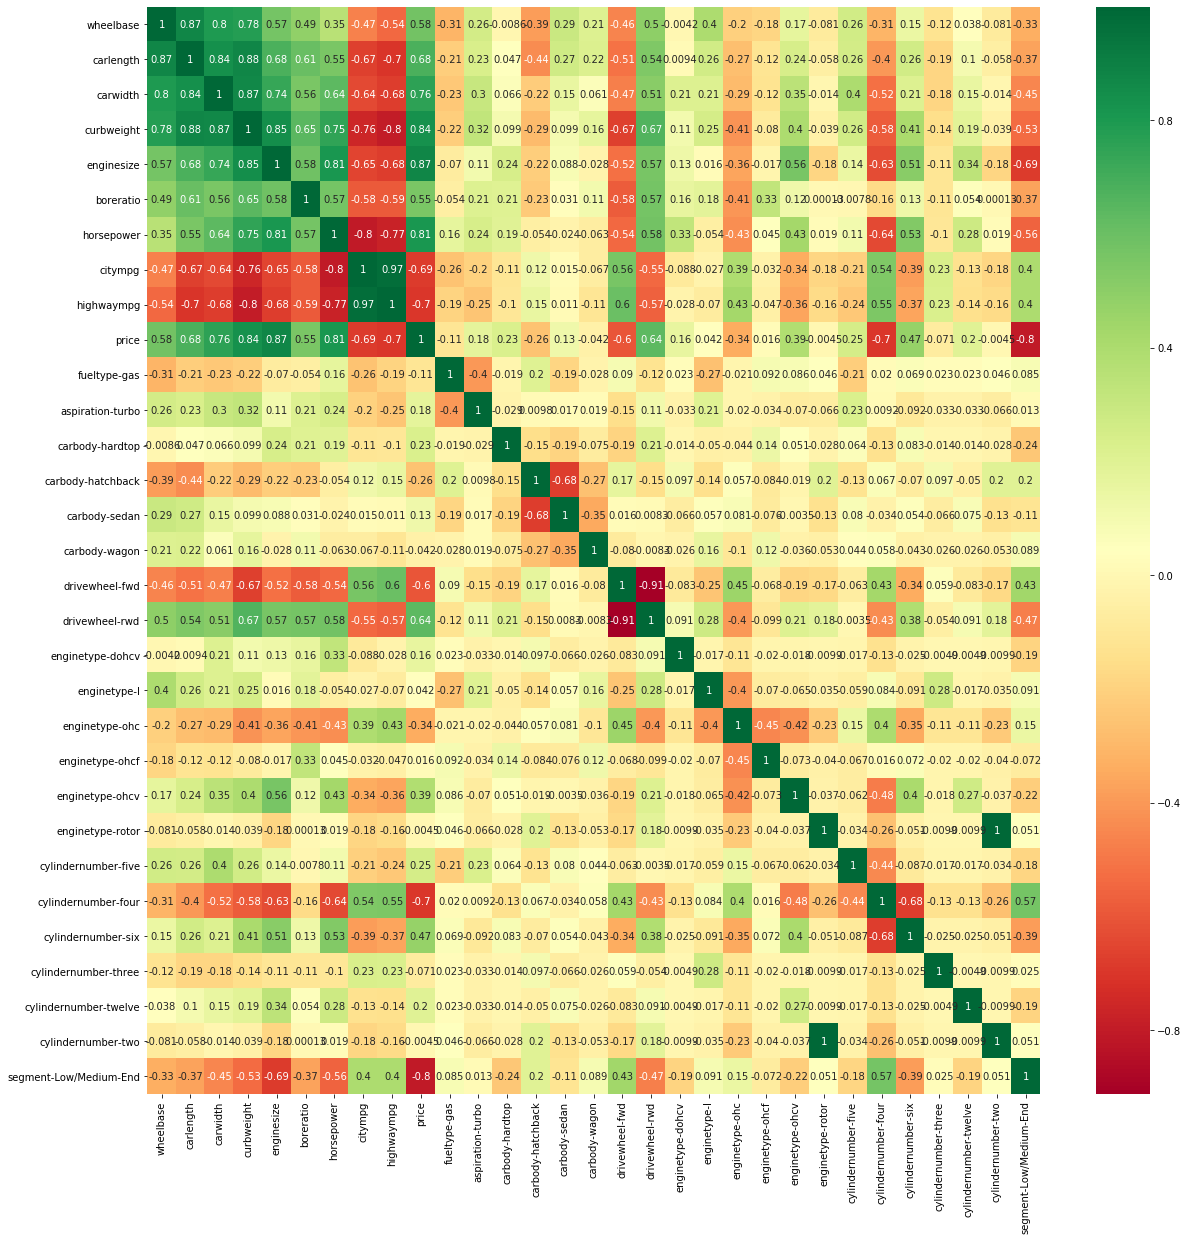

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df_v3.corr() , annot = True , cmap = "RdYlGn")
plt.show()

Strong correlation among dimensional and weight vars. It would help to include some interaction variables to take care of VIF at the time of model building and also help retain the effect of these features.

In [30]:
num_vars = df_v2.select_dtypes(exclude = [np.object]).columns
print(num_vars)

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')


#### Modeling

In [31]:
print(num_vars)

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [32]:
#Train test split
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df_v3,test_size=0.3)
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype-ohcf,enginetype-ohcv,enginetype-rotor,cylindernumber-five,cylindernumber-four,cylindernumber-six,cylindernumber-three,cylindernumber-twelve,cylindernumber-two,segment-Low/Medium-End
165,94.5,168.7,64.0,2265,98,3.24,112,26,29,9298.0,...,0,0,0,0,1,0,0,0,0,1
64,98.8,177.8,66.5,2425,122,3.39,84,26,32,11245.0,...,0,0,0,0,1,0,0,0,0,1
190,94.5,165.7,64.0,2221,109,3.19,90,24,29,9980.0,...,0,0,0,0,1,0,0,0,0,1
82,95.9,173.2,66.3,2833,156,3.58,145,19,24,12629.0,...,0,0,0,0,1,0,0,0,0,1
72,96.6,180.3,70.5,3685,234,3.46,155,16,18,35056.0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype-ohcf,enginetype-ohcv,enginetype-rotor,cylindernumber-five,cylindernumber-four,cylindernumber-six,cylindernumber-three,cylindernumber-twelve,cylindernumber-two,segment-Low/Medium-End
165,-0.657675,-0.389820,-0.870850,-0.535056,-0.678537,-0.350934,0.177208,0.145360,-0.238754,-0.521571,...,0,0,0,0,1,0,0,0,0,1
64,0.017232,0.315215,0.258790,-0.244794,-0.125524,0.204604,-0.505700,0.145360,0.197099,-0.281344,...,0,0,0,0,1,0,0,0,0,1
190,-0.657675,-0.622249,-0.870850,-0.614878,-0.425073,-0.536113,-0.359363,-0.158093,-0.238754,-0.437424,...,0,0,0,0,1,0,0,0,0,1
82,-0.437938,-0.041176,0.168419,0.495373,0.657912,0.908285,0.982065,-0.916724,-0.965177,-0.110582,...,0,0,0,0,1,0,0,0,0,1
72,-0.328069,0.508906,2.066214,2.041018,2.455206,0.463855,1.225961,-1.371904,-1.836884,2.656531,...,0,1,0,0,0,0,0,0,0,0


In [34]:
scaler = StandardScaler()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype-ohcf,enginetype-ohcv,enginetype-rotor,cylindernumber-five,cylindernumber-four,cylindernumber-six,cylindernumber-three,cylindernumber-twelve,cylindernumber-two,segment-Low/Medium-End
39,-0.475752,0.057405,-0.338184,-0.552449,-0.424752,-0.622528,-0.469366,0.215708,0.292736,-0.506572,...,0,0,0,0,1,0,0,0,0,1
35,-0.475752,-1.057717,-0.950370,-1.225039,-0.912933,-1.510660,-0.750531,0.687726,0.439104,-0.710068,...,0,0,0,0,1,0,0,0,0,1
173,0.689108,0.075990,0.325018,-0.502119,-0.099298,-0.030440,-0.300666,0.530387,0.439104,-0.493049,...,0,0,0,0,1,0,0,0,0,1
185,-0.317805,-0.286425,-0.185137,-0.762919,-0.451873,-0.474506,-0.497482,0.215708,0.439104,-0.591909,...,0,0,0,0,1,0,0,0,0,1
197,1.064232,1.302624,0.682127,1.135892,0.416003,1.708819,0.317899,-0.256311,-0.439104,0.500409,...,0,0,0,0,1,0,0,0,0,1


In [35]:
#Check if transormation was fine (Mean should be nearly 0 and std = 1)

df_train.describe().round(decimals=2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype-ohcf,enginetype-ohcv,enginetype-rotor,cylindernumber-five,cylindernumber-four,cylindernumber-six,cylindernumber-three,cylindernumber-twelve,cylindernumber-two,segment-Low/Medium-End
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,...,0.07,0.06,0.02,0.06,0.77,0.10,0.01,0.01,0.02,0.86
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.24,0.14,0.24,0.42,0.31,0.08,0.08,0.14,0.35
min,-1.90,-2.53,-2.54,-1.94,-1.53,-2.94,-1.38,-1.83,-2.13,-1.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.66,-0.60,-0.87,-0.79,-0.70,-0.68,-0.85,-0.92,-0.82,-0.71,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
50%,-0.34,-0.09,-0.24,-0.25,-0.17,0.02,-0.24,-0.16,-0.09,-0.36,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
75%,0.39,0.73,0.44,0.70,0.31,0.91,0.38,0.90,0.92,0.41,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
max,3.49,2.66,2.88,2.73,4.58,2.24,4.47,3.64,3.39,3.43,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [36]:
# Split of X , Y for train Sample

y_train = df_train.pop("price")
x_train = df_train

In [37]:
# Split of X , Y for Test Sample

y_test = df_test.pop("price")
x_test = df_test

In [38]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'fueltype-gas',
       'aspiration-turbo', 'carbody-hardtop', 'carbody-hatchback',
       'carbody-sedan', 'carbody-wagon', 'drivewheel-fwd', 'drivewheel-rwd',
       'enginetype-dohcv', 'enginetype-l', 'enginetype-ohc', 'enginetype-ohcf',
       'enginetype-ohcv', 'enginetype-rotor', 'cylindernumber-five',
       'cylindernumber-four', 'cylindernumber-six', 'cylindernumber-three',
       'cylindernumber-twelve', 'cylindernumber-two',
       'segment-Low/Medium-End'],
      dtype='object')

As there are a lot of variables feature selection in an efficient way is required. The RFE(Recursive Feature Elimination) can be used to get optimal number of features.  \
This should give us an optimal number of features required to predict prices.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

The optimal number of features to be used is %d 17
Score v/s features %d (17, 0.8818579268061991)


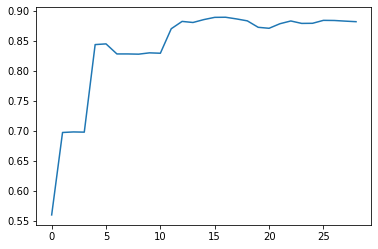

In [40]:
# This should help understand the right number of features required.
##Adds more number of relevant features one by one and evaluates model on test data


nof_list = np.arange(1,len(x_train.columns))
prev_score = 0
nof = 0
score_list = []
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model , nof_list[n] )
    x_train_rfe = rfe.fit_transform(x_train , y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe , y_train)
    score = model.score(x_test_rfe , y_test)
    score_list.append(score)
    if(score > prev_score):
        prev_score = score
        nof = nof_list[n]

print("The optimal number of features to be used is %d", nof )
print("Score v/s features %d", (nof,score) )
plt.plot(range(len(x_train.columns)-1) , score_list)


In [41]:
for i in range(1,25):
    print(i,score_list[i].round(decimals=3))

1 0.697
2 0.698
3 0.698
4 0.844
5 0.845
6 0.828
7 0.828
8 0.828
9 0.83
10 0.829
11 0.87
12 0.882
13 0.881
14 0.885
15 0.889
16 0.889
17 0.886
18 0.883
19 0.872
20 0.871
21 0.878
22 0.883
23 0.879
24 0.879


#### Inference 
> After 12 features the incremental information gain is too less.  \
> Adding more variables would lead to over-fitting and might capture noise

>let's start modeling using 10 features and eliminate as we check VIF and significance

In [42]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, 12)
rfe = rfe.fit(x_train, y_train)

In [43]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('curbweight', False, 11),
 ('enginesize', False, 16),
 ('boreratio', False, 15),
 ('horsepower', True, 1),
 ('citympg', False, 14),
 ('highwaympg', False, 9),
 ('fueltype-gas', False, 6),
 ('aspiration-turbo', False, 7),
 ('carbody-hardtop', False, 5),
 ('carbody-hatchback', False, 2),
 ('carbody-sedan', False, 4),
 ('carbody-wagon', False, 3),
 ('drivewheel-fwd', False, 18),
 ('drivewheel-rwd', False, 13),
 ('enginetype-dohcv', True, 1),
 ('enginetype-l', False, 19),
 ('enginetype-ohc', False, 12),
 ('enginetype-ohcf', False, 10),
 ('enginetype-ohcv', True, 1),
 ('enginetype-rotor', True, 1),
 ('cylindernumber-five', True, 1),
 ('cylindernumber-four', True, 1),
 ('cylindernumber-six', True, 1),
 ('cylindernumber-three', True, 1),
 ('cylindernumber-twelve', True, 1),
 ('cylindernumber-two', True, 1),
 ('segment-Low/Medium-End', True, 1)]

In [44]:
x_train.columns[rfe.support_]

Index(['carwidth', 'horsepower', 'enginetype-dohcv', 'enginetype-ohcv',
       'enginetype-rotor', 'cylindernumber-five', 'cylindernumber-four',
       'cylindernumber-six', 'cylindernumber-three', 'cylindernumber-twelve',
       'cylindernumber-two', 'segment-Low/Medium-End'],
      dtype='object')

>> Using statsmodel to get detailed view of parameters

In [45]:
import statsmodels.api as sm 

In [46]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,carwidth,horsepower,enginetype-dohcv,enginetype-ohcv,enginetype-rotor,cylindernumber-five,cylindernumber-four,cylindernumber-six,cylindernumber-three,cylindernumber-twelve,cylindernumber-two,segment-Low/Medium-End
165,-0.870850,0.177208,0,0,0,0,1,0,0,0,0,1
64,0.258790,-0.505700,0,0,0,0,1,0,0,0,0,1
190,-0.870850,-0.359363,0,0,0,0,1,0,0,0,0,1
82,0.168419,0.982065,0,0,0,0,1,0,0,0,0,1
72,2.066214,1.225961,0,1,0,0,0,0,0,0,0,0


Model Building with addition of constant

In [47]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

>> Iteration 1

In [48]:
x_train_updated = build_model(x_train_rfe,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           5.34e-71
Time:                        22:04:48   Log-Likelihood:                -10.193
No. Observations:                 143   AIC:                             44.39
Df Residuals:                     131   BIC:                             79.94
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
5,enginetype-rotor,inf
11,cylindernumber-two,inf
0,const,113.64
7,cylindernumber-four,29.78
8,cylindernumber-six,10.05
6,cylindernumber-five,8.60
4,enginetype-ohcv,3.36
2,horsepower,3.32
12,segment-Low/Medium-End,2.64
1,carwidth,2.60


Remove variables one by one based on VIF and significance

>> Iteration 2

In [49]:
x_train_updated = x_train_updated.drop("enginetype-rotor" , axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           5.34e-71
Time:                        22:06:24   Log-Likelihood:                -10.193
No. Observations:                 143   AIC:                             44.39
Df Residuals:                     131   BIC:                             79.94
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,113.64
6,cylindernumber-four,29.78
7,cylindernumber-six,10.05
5,cylindernumber-five,8.60
10,cylindernumber-two,4.42
4,enginetype-ohcv,3.36
2,horsepower,3.32
11,segment-Low/Medium-End,2.64
1,carwidth,2.60
8,cylindernumber-three,2.37


>> Iteration 3

In [50]:
x_train_updated = x_train_updated.drop("cylindernumber-four" , axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           3.56e-67
Time:                        22:07:04   Log-Likelihood:                -22.640
No. Observations:                 143   AIC:                             67.28
Df Residuals:                     132   BIC:                             99.87
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,12.95
2,horsepower,3.32
1,carwidth,2.49
6,cylindernumber-six,1.89
10,segment-Low/Medium-End,1.70
4,enginetype-ohcv,1.56
5,cylindernumber-five,1.43
3,enginetype-dohcv,1.39
8,cylindernumber-twelve,1.37
7,cylindernumber-three,1.07


>> Iteration 4  

In [51]:
x_train_updated = x_train_updated.drop("cylindernumber-two" , axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.78e-68
Time:                        22:08:43   Log-Likelihood:                -22.687
No. Observations:                 143   AIC:                             65.37
Df Residuals:                     133   BIC:                             95.00
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,12.95
2,horsepower,3.27
1,carwidth,2.49
6,cylindernumber-six,1.88
9,segment-Low/Medium-End,1.69
4,enginetype-ohcv,1.56
5,cylindernumber-five,1.43
3,enginetype-dohcv,1.38
8,cylindernumber-twelve,1.37
7,cylindernumber-three,1.07


>> Iteration 5 

In [52]:
x_train_updated = x_train_updated.drop("enginetype-ohcv" , axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           6.96e-69
Time:                        22:09:13   Log-Likelihood:                -24.056
No. Observations:                 143   AIC:                             66.11
Df Residuals:                     134   BIC:                             92.78
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,12.94
2,horsepower,3.23
1,carwidth,2.32
5,cylindernumber-six,1.75
8,segment-Low/Medium-End,1.68
4,cylindernumber-five,1.38
3,enginetype-dohcv,1.35
7,cylindernumber-twelve,1.28
6,cylindernumber-three,1.07


>> Iteration 6 

In [55]:
#x_train_updated = x_train_updated.drop("cylindernumber-six", axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     213.2
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           1.01e-69
Time:                        22:11:01   Log-Likelihood:                -24.900
No. Observations:                 143   AIC:                             65.80
Df Residuals:                     135   BIC:                             89.50
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,11.10
2,horsepower,2.38
1,carwidth,2.24
7,segment-Low/Medium-End,1.57
4,cylindernumber-five,1.35
3,enginetype-dohcv,1.20
6,cylindernumber-twelve,1.15
5,cylindernumber-three,1.06


>> Iteration 7

In [57]:
x_train_updated = x_train_updated.drop("cylindernumber-five", axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.58e-70
Time:                        22:13:47   Log-Likelihood:                -26.420
No. Observations:                 143   AIC:                             66.84
Df Residuals:                     136   BIC:                             87.58
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,10.59
2,horsepower,2.28
1,carwidth,1.77
6,segment-Low/Medium-End,1.55
3,enginetype-dohcv,1.19
5,cylindernumber-twelve,1.14
4,cylindernumber-three,1.06


>> Iteration 8

In [58]:
x_train_updated = x_train_updated.drop("cylindernumber-three", axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     287.3
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           9.10e-71
Time:                        22:14:54   Log-Likelihood:                -28.361
No. Observations:                 143   AIC:                             68.72
Df Residuals:                     137   BIC:                             86.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,10.49
2,horsepower,2.27
1,carwidth,1.71
5,segment-Low/Medium-End,1.54
3,enginetype-dohcv,1.19
4,cylindernumber-twelve,1.14


>> Iteration 9

In [59]:
x_train_updated = x_train_updated.drop("cylindernumber-twelve", axis = 1)
x_train_updated = build_model(x_train_updated,y_train)
checkVIF(x_train_updated)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     351.3
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.83e-71
Time:                        22:16:51   Log-Likelihood:                -30.273
No. Observations:                 143   AIC:                             70.55
Df Residuals:                     138   BIC:                             85.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,10.44
2,horsepower,2.11
1,carwidth,1.70
4,segment-Low/Medium-End,1.53
3,enginetype-dohcv,1.16


### Evaluation

In [60]:
lm = sm.OLS(y_train,x_train_updated).fit()
y_train_pred = lm.predict(x_train_updated)

Text(0.5, 0, 'Errors')

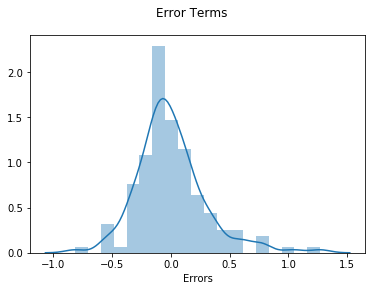

In [61]:
plt.figure()
sns.distplot(y_train - y_train_pred)
plt.suptitle("Error Terms")
plt.xlabel("Errors")

Error terms seem to be normally distributed which approves the choice for linear modeling

>>>Predictoin of Test Sample

In [62]:
predictors = x_train_updated.drop("const" , axis = 1).columns

In [63]:
print(predictors)

Index(['carwidth', 'horsepower', 'enginetype-dohcv', 'segment-Low/Medium-End'], dtype='object')


In [64]:
x_test_updated = x_test[predictors]
x_test_updated = sm.add_constant(x_test_updated)

C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
y_test_pred = lm.predict(x_test_updated)

R2 Score

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test , y_test_pred)

0.889061494465648

Scattern Plot of Actual v/s Predicted Price

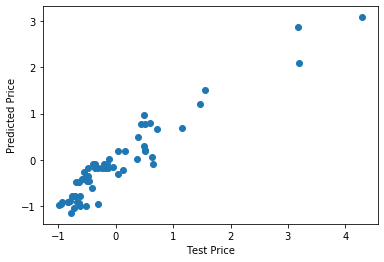

In [67]:
plt.figure()
plt.scatter(y_test , y_test_pred)
plt.xlabel("Test Price")
plt.ylabel("Predicted Price")
plt.show()


> Summary

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     351.3
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.83e-71
Time:                        22:17:42   Log-Likelihood:                -30.273
No. Observations:                 143   AIC:                             70.55
Df Residuals:                     138   BIC:                             85.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

>> ## Model Quality Inference

> R2 score is good and ~90% of variance is explained
> Prob(F-Statistic) is near '0' meaning coefficients are relevant and the equation is not random or by chance

Note : As suggested by correlation matrix , I had tried adding interaction variables. They gave good results in terms of score and were volatile.Also some important variables like "horsepower" were becoming insignificant

There does like a scope for improvement. Multiple iterations of interaction variables can be tried to get to optimal results.